In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))
class SingleReasoning:
    
    def __init__(self,*,p_cause, p_effect, p_effect_given_cause):
        self.p_effect = p_effect
        self.p_cause = p_cause
        self.p_effect_given_cause = p_effect_given_cause
        
    def evaluate(self):
        p_cause_given_effect = (self.p_effect_given_cause * self.p_cause)/self.p_effect
        return p_cause_given_effect
    
    def __repr__(self):
        return f'P(E)={self.p_effect}, P(C)={self.p_cause}, P(E|C)={self.p_effect_given_cause}\n' + \
        f'P(C|E) = (P(E|C) * P(C))/P(E) = ({self.p_effect_given_cause} * {self.p_cause})/{self.p_effect} = {self.evaluate():.5f}'

<Figure size 576x576 with 0 Axes>

In [3]:
print("P(E)=Probability of a loss of smell")
print("P(C)=Probability of being covid positive in Poland")
print("P(E)=Probability of a loss of smell given being covid positive")
print("The probability of a person being infected given loss of smell is:")
print(SingleReasoning(p_cause=0.0062, p_effect=0.01, p_effect_given_cause=0.9))

P(E)=Probability of a loss of smell
P(C)=Probability of being covid positive in Poland
P(E)=Probability of a loss of smell given being covid positive
The probability of a person being infected given loss of smell is:
P(E)=0.01, P(C)=0.0062, P(E|C)=0.9
P(C|E) = (P(E|C) * P(C))/P(E) = (0.9 * 0.0062)/0.01 = 0.55800


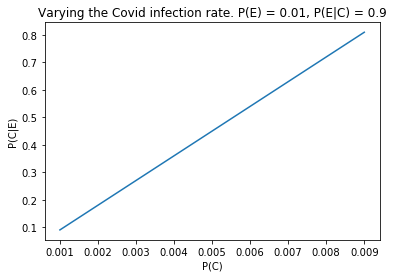

When the covid infection rate would be higher, overall probability of being infected given loss of smell woud be higher 


In [4]:
plt.title("Varying the Covid infection rate. P(E) = 0.01, P(E|C) = 0.9")
p_e = 0.01
p_egc = 0.9
plt.xlabel("P(C)")
plt.ylabel("P(C|E)")
p_c = np.arange(0.001, 0.01, 0.001)
p_cge = np.array([SingleReasoning(p_cause=c, p_effect=p_e, p_effect_given_cause=p_egc).evaluate() for c in p_c])
plt.plot(p_c, p_cge)
plt.show()
print("When the covid infection rate would be higher, overall probability of being infected given loss of smell woud be higher ")

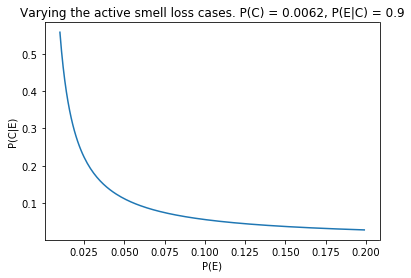

When smell loss is more common overall, it is less of a discriminating factor in determining covid infection
If smell loss would be extremely rare - having it would be a determining factor indicating someone is covid positive
If smell loss would be common - it would not be a clear indicator of whether someone is covid positve or not


In [5]:
plt.title("Varying the active smell loss cases. P(C) = 0.0062, P(E|C) = 0.9")
p_c = 0.0062
p_egc = 0.9
plt.xlabel("P(E)")
plt.ylabel("P(C|E)")
p_e = np.arange(0.01, 0.2, 0.001)
p_cge = np.array([SingleReasoning(p_cause=p_c, p_effect=e, p_effect_given_cause=p_egc).evaluate() for e in p_e])
plt.plot(p_e, p_cge)
plt.show()

print("When smell loss is more common overall, it is less of a discriminating factor in determining covid infection")
print("If smell loss would be extremely rare - having it would be a determining factor indicating someone is covid positive")
print("If smell loss would be common - it would not be a clear indicator of whether someone is covid positve or not")

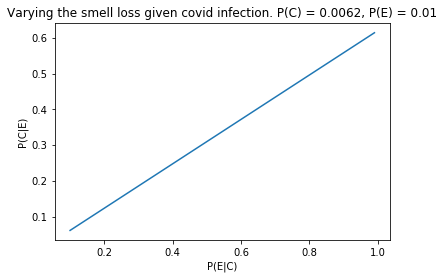

In [6]:
plt.title("Varying the smell loss given covid infection. P(C) = 0.0062, P(E) = 0.01")
p_c = 0.0062
p_e = 0.01
plt.xlabel("P(E|C)")
plt.ylabel("P(C|E)")
p_egc = np.arange(0.1, 1.0, 0.01)
p_cge = np.array([SingleReasoning(p_cause=p_c, p_effect=p_e, p_effect_given_cause=egc).evaluate() for egc in p_egc])
plt.plot(p_egc, p_cge)

In [7]:
# Test the class for p(C)=0.2, P(L)=0.001, P(L|C)=0.01. What happened? Why? How to fix it?
print(SingleReasoning(p_cause=0.2, p_effect=0.001, p_effect_given_cause=0.01))


# P(Covid) = 0.2
# P(Loss Of Smell) = 0.001
# P(Loss Of Smell Given Covid) = 0.01
# What happened: The function representing the probability isn't bounded
# P(L|C)P(C) <= P(L) since P(E)=P(E|C)P(C) + P(E|~C)P(~C)
# 0.01 * 0.2 = 0.002 > 0.001 !! 
# thus the assumptions are wrong and the result is incorrect

P(E)=0.001, P(C)=0.2, P(E|C)=0.01
P(C|E) = (P(E|C) * P(C))/P(E) = (0.01 * 0.2)/0.001 = 2.00000


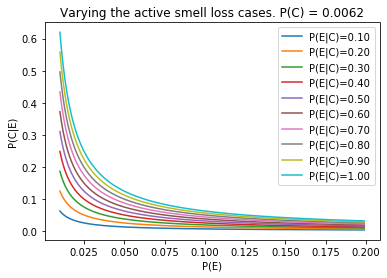

In [8]:
plt.title("Varying the active smell loss cases. P(C) = 0.0062")
p_c = 0.0062
p_egc = 0.9
#
plt.xlabel("P(E)")
plt.ylabel("P(C|E)")
for egc in np.arange(0.1, 1.1, 0.1):
    p_e = np.arange(0.01, 0.2, 0.001)
    p_cge = np.array([SingleReasoning(p_cause=p_c, p_effect=e, p_effect_given_cause=egc).evaluate() for e in p_e])
    plt.plot(p_e, p_cge, label=f'P(E|C)={egc:.2f}')
plt.legend()
plt.show()


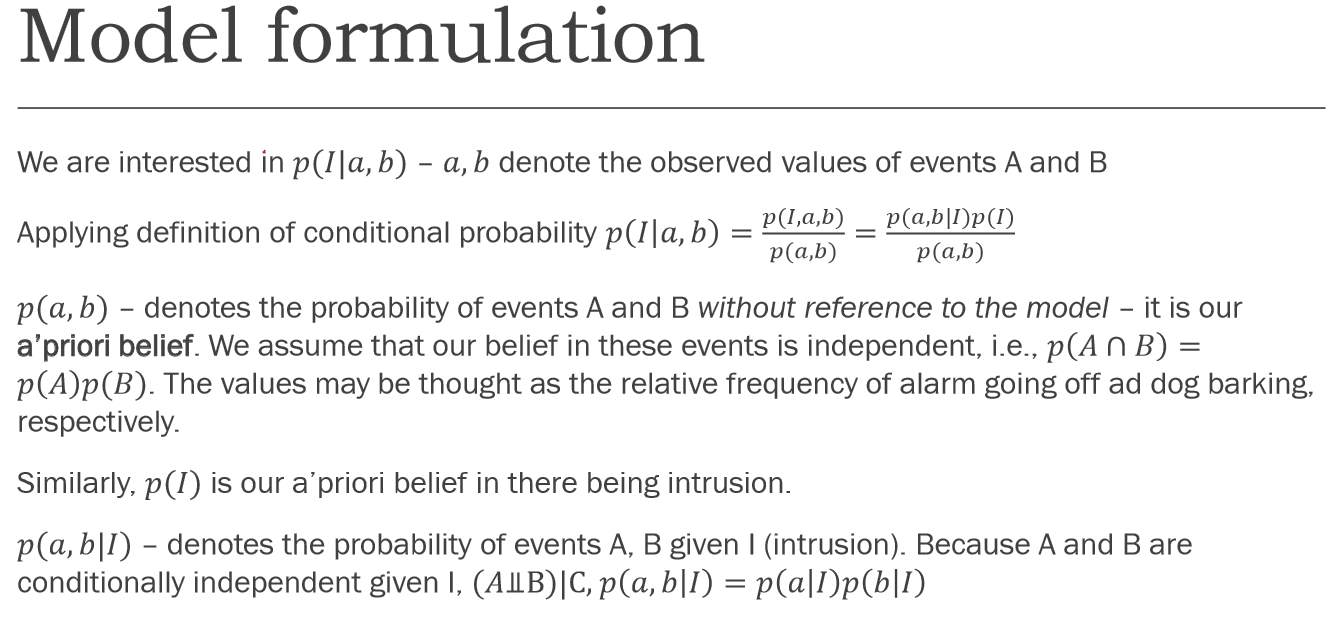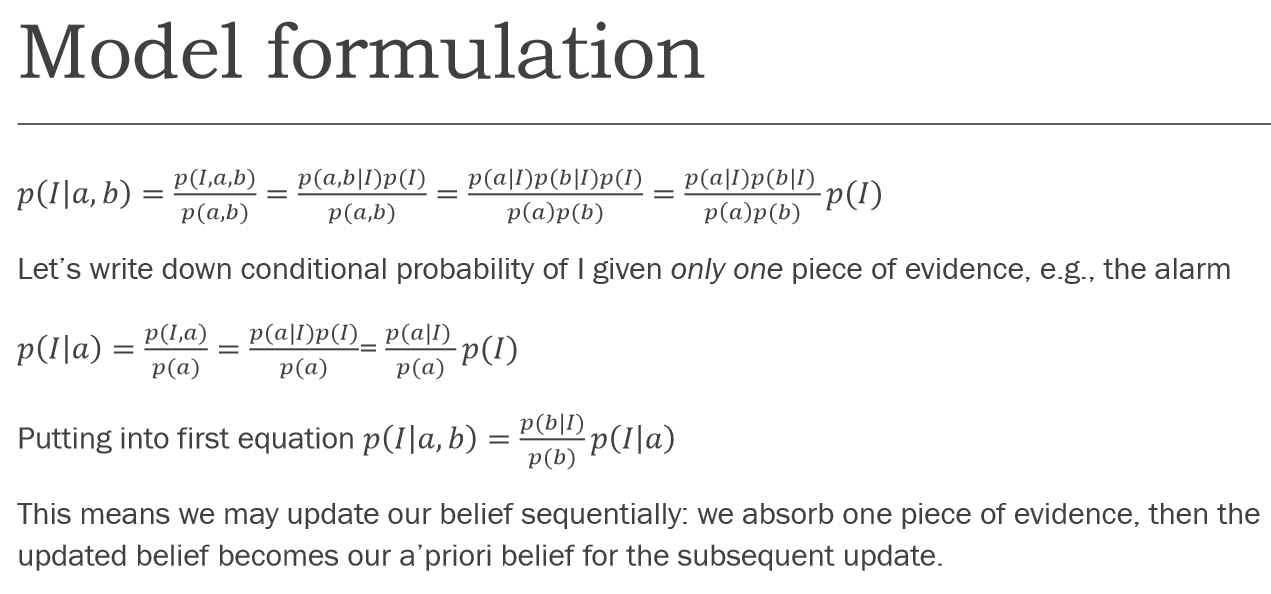

In [27]:
class MultipleReasoning:
    
    def __init__(self, p_cause):
        self.p_cause = p_cause
        self.p_cause_given_info = p_cause
        
    def add_info(self, p_effect, p_effect_given_cause):
        self.p_cause_given_info = (p_effect_given_cause/p_effect) * self.p_cause_given_info
    
    def evaluate(self):
        return self.p_cause_given_info

With no other info given, the probability of intrusion is 0.002
Scenario one
We know that alarm phoned this night. Prob. of alarm phoning: 0.01, prob. of alarm phoning given intrusion: 0.8
None
Given this information, we calculate the probability of intrusion: 0.16

We phone the neighbour to ask about the dog. Dog barked.
Prob. of dog barking: 0.5, prob. of dog barking given intrusion: 0.98
Given this information, we calculate the probability of intrusion: 0.3136


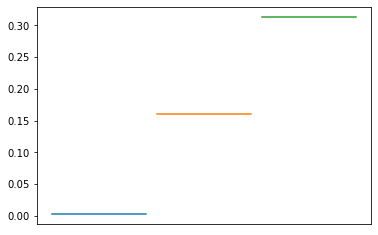

In [45]:
p_i = 0.002 #probability of intrusion
mr = MultipleReasoning(p_i)
x = np.arange(0,30)
print(f"With no other info given, the probability of intrusion is {mr.evaluate()}")
p_a = 0.01
p_b = 0.5
p_a_i = 0.8
p_b_i = 0.98
plt.plot(x[0:10], [mr.evaluate()] * 10)
print("Scenario one")
print(f"We know that alarm phoned this night. Prob. of alarm phoning: {p_a}, prob. of alarm phoning given intrusion: {p_a_i}")
print(mr.add_info(p_a, p_a_i))
plt.plot(x[10:20], [mr.evaluate()] * 10)
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")
print()
print(f"We phone the neighbour to ask about the dog. Dog barked.\nProb. of dog barking: {p_b}, prob. of dog barking given intrusion: {p_b_i}")
mr.add_info(p_b, p_b_i)
plt.plot(x[20:30], [mr.evaluate()] * 10)
plt.xticks([])
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")

With no other info given, the probability of intrusion is 0.002
Scenario two
We know that alarm phoned this night. Prob. of alarm phoning: 0.01, prob. of alarm phoning given intrusion: 0.8
Given this information, we calculate the probability of intrusion: 0.16

We phone the neighbour to ask about the dog. Dog did not bark.
Prob. of dog barking: 0.5, prob. of dog barking given intrusion: 0.98
Given this information, we calculate the probability of intrusion: 0.0064000000000000055


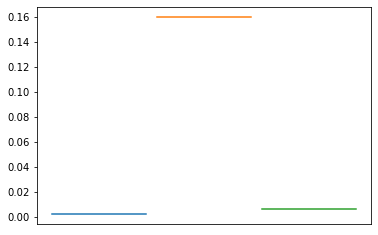

In [46]:
p_i = 0.002 #probability of intrusion
mr = MultipleReasoning(p_i)
x = np.arange(0,30)
print(f"With no other info given, the probability of intrusion is {mr.evaluate()}")
p_a = 0.01
p_b = 0.5
p_a_i = 0.8
p_b_i = 0.98
plt.plot(x[0:10], [mr.evaluate()] * 10)
print("Scenario two")
print(f"We know that alarm phoned this night. Prob. of alarm phoning: {p_a}, prob. of alarm phoning given intrusion: {p_a_i}")
mr.add_info(p_a, p_a_i)
plt.plot(x[10:20], [mr.evaluate()] * 10)
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")
print()
print(f"We phone the neighbour to ask about the dog. Dog did not bark.\nProb. of dog barking: {p_b}, prob. of dog barking given intrusion: {p_b_i}")
mr.add_info(1 - p_b, 1 - p_b_i)
plt.plot(x[20:30], [mr.evaluate()] * 10)
plt.xticks([])
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")

With no other info given, the probability of intrusion is 0.002
Scenario three
Dog barked last night
Given this information, we calculate the probability of intrusion: 0.00392

Alarm did not go off
Given this information, we calculate the probability of intrusion: 0.0007919191919191918


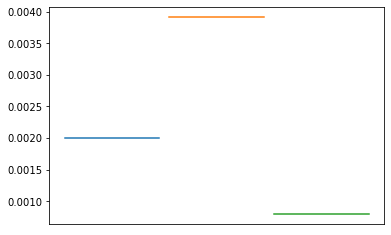

In [47]:
p_i = 0.002 #probability of intrusion
mr = MultipleReasoning(p_i)
x = np.arange(0,30)
print(f"With no other info given, the probability of intrusion is {mr.evaluate()}")
p_a = 0.01
p_b = 0.5
p_a_i = 0.8
p_b_i = 0.98
plt.plot(x[0:10], [mr.evaluate()] * 10)
print("Scenario three")
print(f"Dog barked last night")
mr.add_info(p_b, p_b_i)
plt.plot(x[10:20], [mr.evaluate()] * 10)
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")
print()
print(f"Alarm did not go off")
mr.add_info(1 - p_a, 1 - p_a_i)
plt.plot(x[20:30], [mr.evaluate()] * 10)
plt.xticks([])
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")

With no other info given, the probability of intrusion is 0.002
Scenario four
Dog barked last night
Given this information, we calculate the probability of intrusion: 0.00392

Alarm did go off
Given this information, we calculate the probability of intrusion: 0.3136


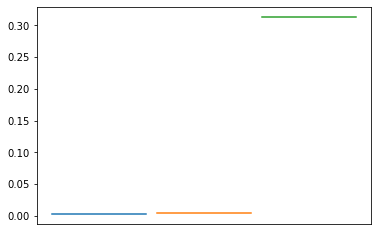

In [48]:
p_i = 0.002 #probability of intrusion
x = np.arange(0,30)
mr = MultipleReasoning(p_i)

print(f"With no other info given, the probability of intrusion is {mr.evaluate()}")
p_a = 0.01
p_b = 0.5
p_a_i = 0.8
p_b_i = 0.98

plt.plot(x[0:10], [mr.evaluate()] * 10)
print("Scenario four")
print(f"Dog barked last night")
mr.add_info(p_b, p_b_i)
plt.plot(x[10:20], [mr.evaluate()] * 10)
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")
print()
print(f"Alarm did go off")
mr.add_info(p_a, p_a_i)
plt.plot(x[20:30], [mr.evaluate()] * 10)
plt.xticks([])
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")

With no other info given, the probability of intrusion is 0.002
Scenario four
Dog barked last night
Given this information, we calculate the probability of intrusion: 0.00392

Alarm did go off
Given this information, we calculate the probability of intrusion: 0.3136


([], <a list of 0 Text xticklabel objects>)

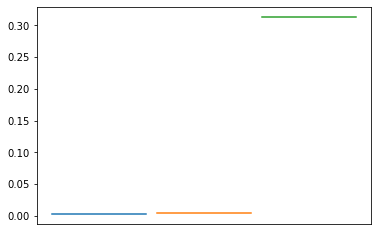

In [49]:
x = np.arange(0,30)
p_i = 0.002 #probability of intrusion
mr = MultipleReasoning(p_i)

print(f"With no other info given, the probability of intrusion is {mr.evaluate()}")
p_a = 0.01
p_b = 0.5
p_a_i = 0.8
p_b_i = 0.98
plt.plot(x[0:10], [mr.evaluate()] * 10)
print("Scenario four")
print(f"Dog barked last night")
mr.add_info(p_b, p_b_i)
plt.plot(x[10:20], [mr.evaluate()] * 10)
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")
print()
print(f"Alarm did go off")
mr.add_info(p_a, p_a_i)
plt.plot(x[20:30], [mr.evaluate()] * 10)
print(f"Given this information, we calculate the probability of intrusion: {mr.evaluate()}")
plt.xticks([])

## 3. Going back to the example, consider situation when the alarm is not silent –it blares horn and flashes light when it goes off. Can computations still be performed in the same manner? Explain.


In [ ]:
# The combinations cannot be done, because in the following scenario, the events would not be independent
# flashing lights and sounds will alert the dog
# thus, the bayes formula would not hold